# 0. configurando o ambiente

In [284]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. Realizando exploração inicial de dados

## 1.1 Carregando dataset inicial

In [285]:
#carregando o dataset inicial
bangalore_df = pd.read_csv('datasets/housing/housing_Bangalore.csv')
bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [286]:
print("Informações do dataset:")
print("Linhas e Colunas (linha, coluna): " + str(bangalore_df.shape))
print("Colunas: " + str(bangalore_df.columns))

Informações do dataset:
Linhas e Colunas (linha, coluna): (6207, 40)
Colunas: Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


## 1.2 Visualizando a disposição dos dados no dataset

- Para dados discretos utiliza-se histograma com a frequencia de aparição
- Para dados continuos utiliza-se boxplot para observar a distribuição


In [287]:
bangalore_df.info() #informações de cada coluna do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [288]:
temp_continous = bangalore_df.select_dtypes(include=['float64', 'int64'])
temp_discrete = bangalore_df.select_dtypes(include=['object'])

In [289]:
temp_discrete.shape
#Somente uma coluna com dados discretos

(6207, 1)

In [290]:
temp_continous.shape
# 39 colunas com dados contínuos

(6207, 39)

In [291]:
temp_discrete['Location'].duplicated().value_counts()
# 5905 endereços duplicados


True     5905
False     302
Name: Location, dtype: int64

In [292]:
temp_discrete['Location'].value_counts().count()
# 302 endereços únicos

302

In [293]:
temp_discrete['Location'].value_counts().head(10)
# 10 endereços com mais imóveis

Electronic City Phase 2             232
RR Nagar                            217
Begur                               186
Varthur                             168
Kumaraswamy Layout                  154
Attibele                            151
Narayanapura on Hennur Main Road    148
Electronic City Phase 1             139
Harlur                              135
Krishnarajapura                     131
Name: Location, dtype: int64

In [294]:
# Possuimos 39 colunas com dados contínuos, vamos observar a distribuição dos dados de cada coluna
temp_continous.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [295]:
# Podemos observar ainda a distribuição dos dados de cada coluna através dos violinplot
# Note que possuimos 39 colunas, podemos representar elas com 39 violinplot, porém isso não é muito prático
# Podemos representar o numero 39 por uma equação 5*8 - 1, ou seja, uma coluna com 5 colunas e 8 linhas com um espaço vazio

# Vamos criar uma função para plotar os violinplot
def plot_boxplot(df, colunas, linhas, figsize):
    fig, axes = plt.subplots(linhas, colunas, figsize = figsize) #Criando o objeto figura e os eixos
    axes = axes.ravel() #Achatando o array de eixos para facilitar a iteração
    for idx, ax in enumerate(axes):
        ax.figure 
        if(idx < len(df.columns)): #Verificando se o indice é menor que o numero de colunas
            coluna = df.columns[idx]
            ax.violinplot(df[coluna])
            ax.set_title(coluna)
    plt.tight_layout()

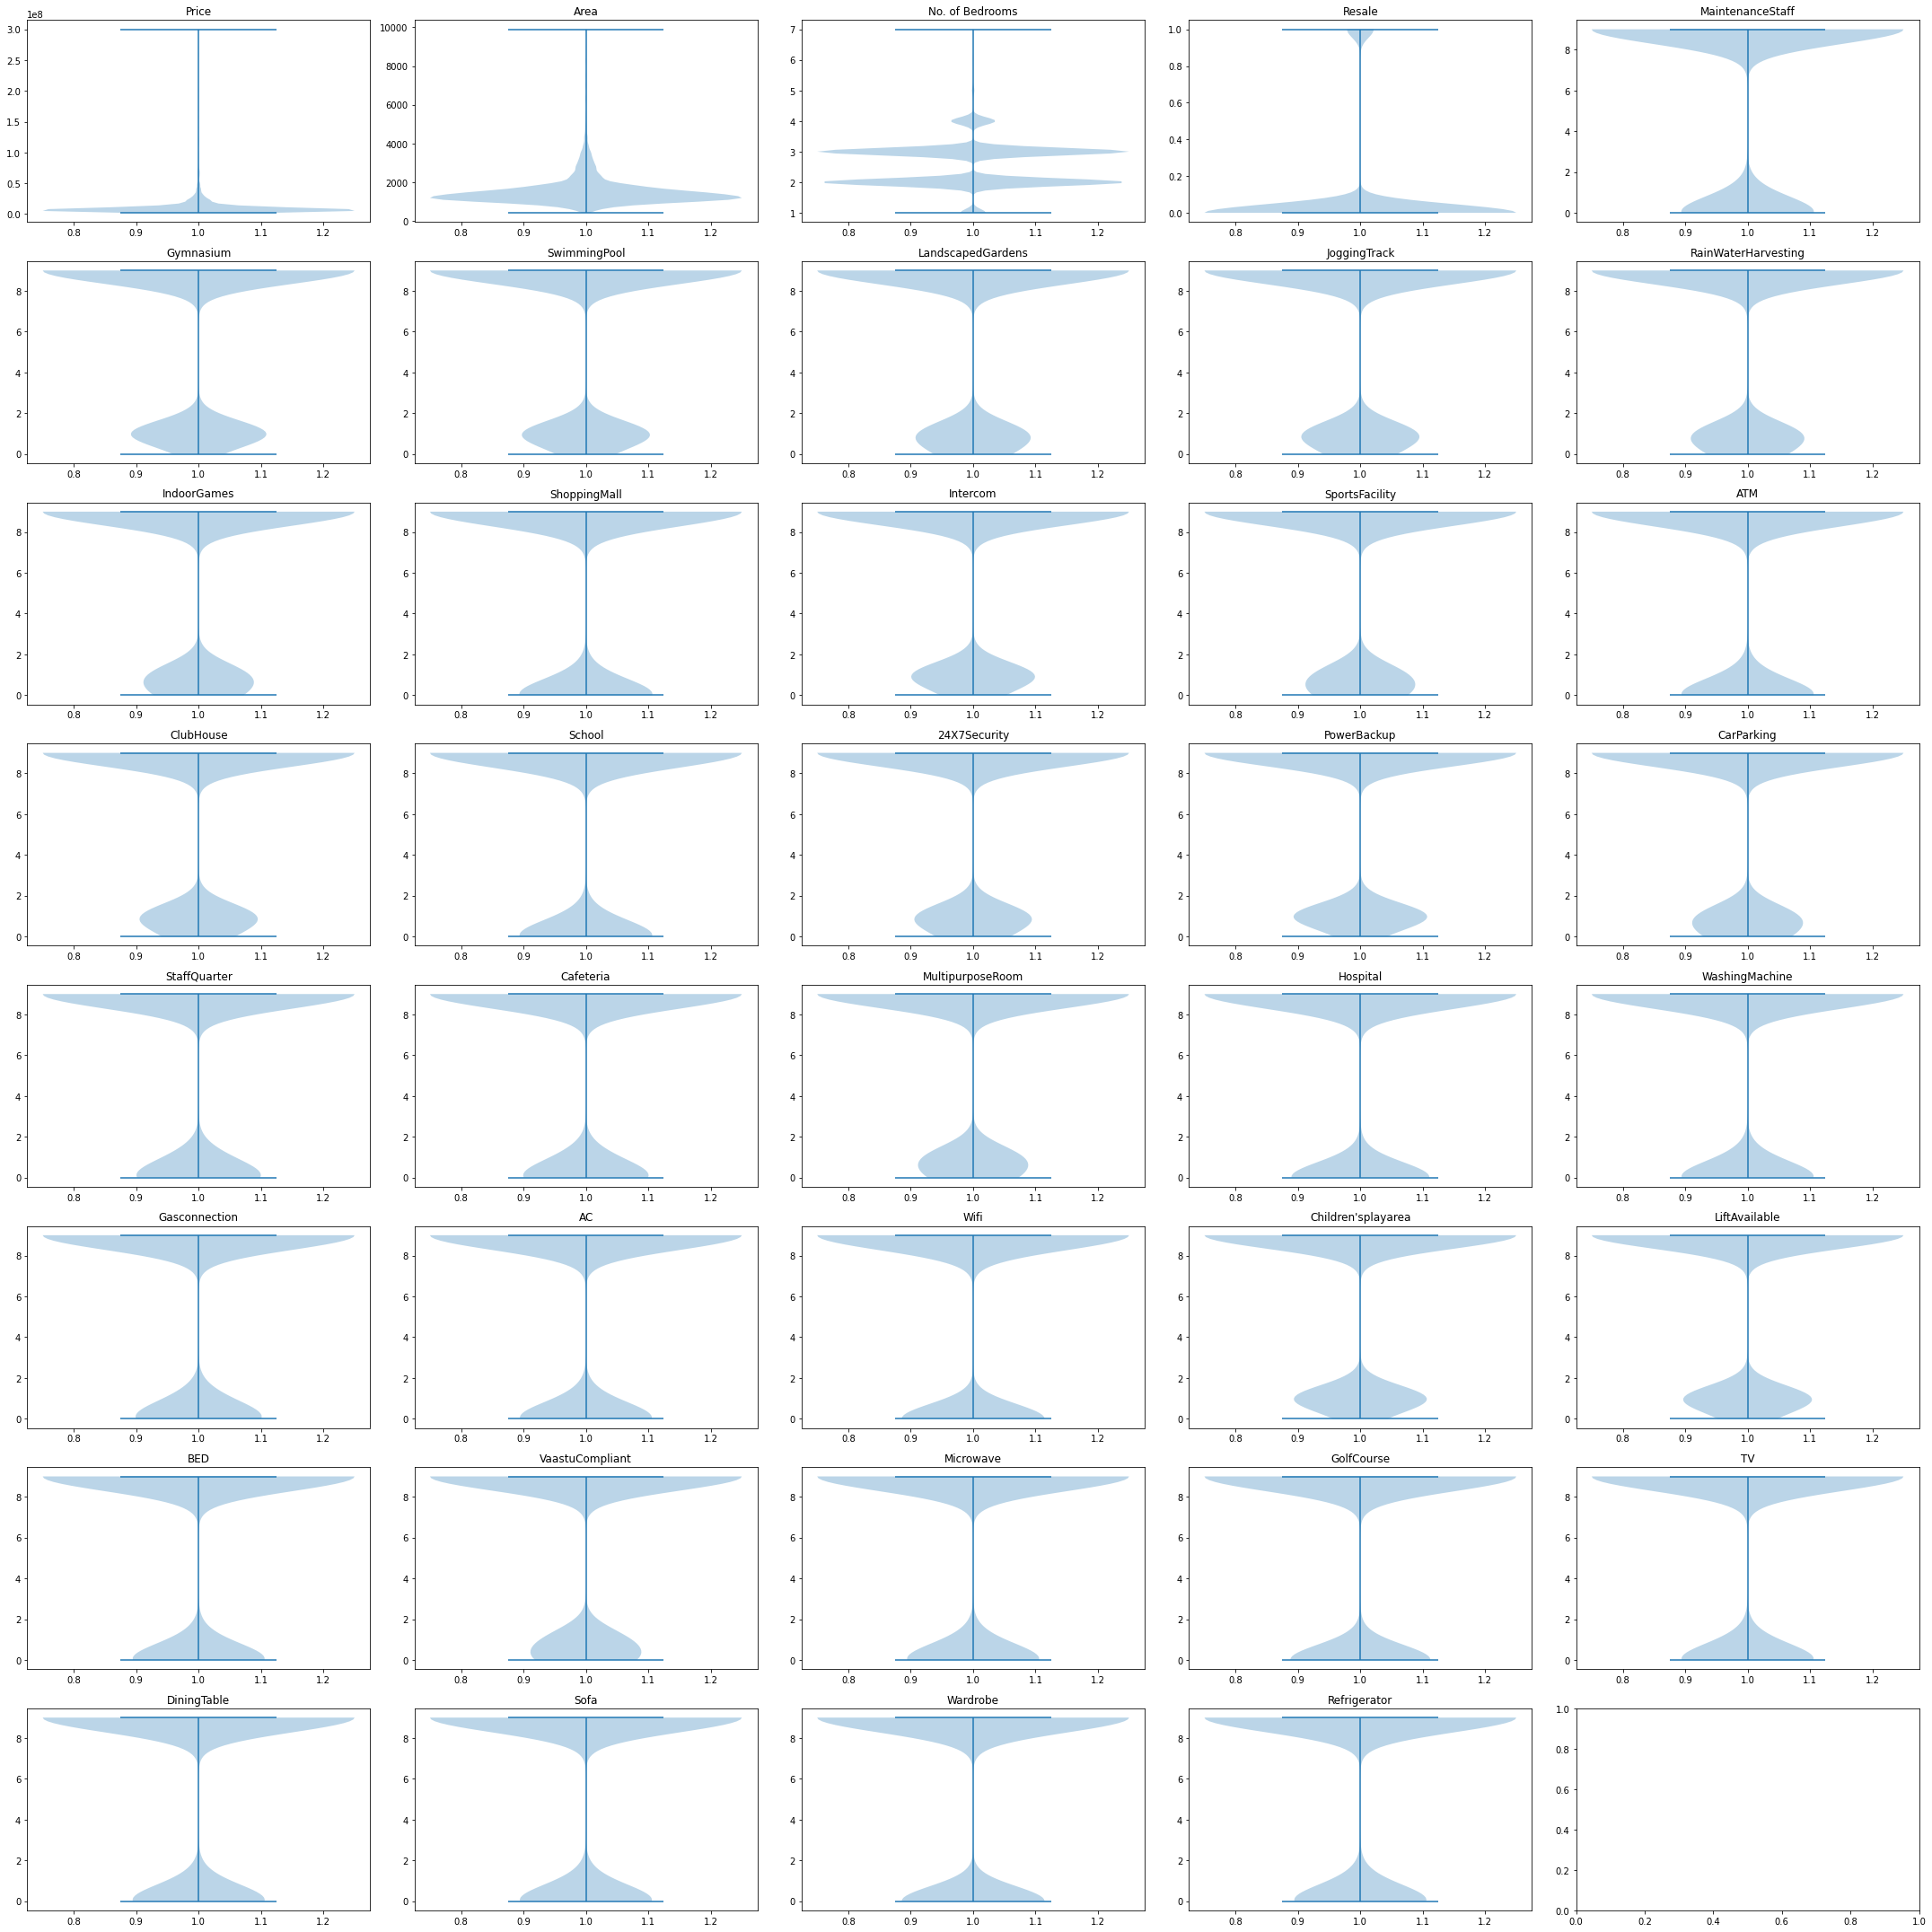

In [296]:
plot_boxplot(temp_continous, 5, 8, (30,30))

In [297]:
#Alguns graficos possuem logica de distribuição, como o número de quartos, banheiros, vagas de garagem, etc
#Outros são dados do tipo boolean (sim ou não), como o SwimmingPool, Furnished, etc
#Note que esses dados deveriam ser representados somente como 1 e 0, porém há dados representado como o numero 9
#Ao verificar a documentação do dataset, vemos que o 9 significa que o imóvel não teve a caracteristica informada
temp_continous['SwimmingPool'].value_counts()

9    4256
1    1645
0     306
Name: SwimmingPool, dtype: int64

## 1.3 limpeza de dados

In [298]:
bangalore_df.isnull().sum().sum()
#Não possuimos dados nulos


0

Após realização de testes notou-se que o coeficiente de determinação do modelo (R²)  tornou-se maior quando os valores de 9 (valores ausentes) na tabela eram mantidos, sendo assim a seguinte linha de codigo foi retirado do notebook:

`bangalore_df = bangalore_df.apply(lambda x: x.replace(9, 0), axis=1)
bangalore_df['SwimmingPool'].value_counts()`

>R² para valores de 9 como 0: 0.18470275947295367 <br>
>R² para valores de 9 mantidos: 0.1854841673440456

In [299]:
def dic_location(df):
    dicionario = {}
    interador = 0
    for valor in df['Location'].unique():
        dicionario[valor] = interador
        interador += 1

    return dicionario

In [300]:
#Como iremos realizar uma regressão linear, precisamos transformar os dados categóricos em dados numéricos
#Para isso vamos criar um dicionário com os valores únicos de cada coluna categórica

#Criando um dicionário com os valores únicos de cada coluna categórica
dicionario_location = dic_location(bangalore_df)
dicionario_location

{'JP Nagar Phase 1': 0,
 'Dasarahalli on Tumkur Road': 1,
 'Kannur on Thanisandra Main Road': 2,
 'Doddanekundi': 3,
 'Kengeri': 4,
 'Horamavu': 5,
 'Thanisandra': 6,
 'Ramamurthy Nagar': 7,
 'Whitefield Hope Farm Junction': 8,
 'Electronic City Phase 1': 9,
 'Yelahanka': 10,
 'Anjanapura': 11,
 'Jalahalli': 12,
 'Kasavanahalli': 13,
 'Bommasandra': 14,
 'Bellandur': 15,
 'RR Nagar': 16,
 'Begur': 17,
 'Hosa Road': 18,
 'Sahakar Nagar': 19,
 'Kadugodi': 20,
 'Jakkur': 21,
 'Jigani': 22,
 'Krishnarajapura': 23,
 'Brookefield': 24,
 'Banashankari': 25,
 'Nelamangala': 26,
 'Attibele': 27,
 'Banaswadi': 28,
 'Kodigehalli': 29,
 'ITPL': 30,
 'Uttarahalli Hobli': 31,
 'Chikkagubbi on Hennur Main Road': 32,
 'Varthur': 33,
 'Vidyaranyapura': 34,
 'Electronic City Phase 2': 35,
 'J. P. Nagar': 36,
 'K. Chudahalli': 37,
 'Narayanaghatta': 38,
 'Anekal City': 39,
 'Sarjapur': 40,
 'Koramangala': 41,
 'Hebbal': 42,
 'Budigere Cross': 43,
 'Bommanahalli': 44,
 'Electronics City': 45,
 'Chikkalasa

In [301]:
#Agora com o dicionario em mão iremos substituir na tabela principal por seus respectivos valores

bangalore_df['Location'] = bangalore_df['Location'].map(dicionario_location)
bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,0,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,1,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,2,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,3,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,4,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [302]:
bangalore_df['Wardrobe'].value_counts()

9    4256
0    1951
Name: Wardrobe, dtype: int64

# 2. Analise de Dados
## 2.1 Verificando correlação entre as colunas

In [303]:
#Vamos verificar a correlação entre as colunas
#Para isso vamos utilizar o método corr()
#O método corr() retorna uma matriz de correlação entre as colunas
#O valor 1 significa que as colunas são iguais
#O valor -1 significa que as colunas são inversamente proporcionais
#O valor 0 significa que as colunas não possuem correlação

corr = bangalore_df.corr() #matriz de correlação com os dados continuos
corr.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.397626,-0.004073,0.234272,-0.038024,0.030497,0.031976,0.034450,0.029744,0.035339,...,0.028814,0.033519,0.029598,0.033460,0.031330,0.033460,0.033460,0.033460,0.030335,0.033460
Area,0.397626,1.000000,-0.009454,0.733010,0.021379,0.008910,0.011436,0.014659,0.011841,0.016572,...,0.008811,0.013280,0.010232,0.013166,0.010982,0.013166,0.013166,0.013166,0.009288,0.013166
Location,-0.004073,-0.009454,1.000000,0.011340,-0.002922,0.303386,0.302669,0.303457,0.302682,0.302876,...,0.302523,0.304696,0.299404,0.304722,0.302785,0.304722,0.304722,0.304722,0.303009,0.304722
No. of Bedrooms,0.234272,0.733010,0.011340,1.000000,-0.015806,0.024080,0.027791,0.031352,0.028554,0.030822,...,0.025848,0.027655,0.025736,0.027576,0.025264,0.027576,0.027576,0.027576,0.024300,0.027576
Resale,-0.038024,0.021379,-0.002922,-0.015806,1.000000,-0.034941,-0.032628,-0.034735,-0.032260,-0.032120,...,-0.030221,-0.036578,-0.026156,-0.036538,-0.034582,-0.036538,-0.036538,-0.036538,-0.033874,-0.036538


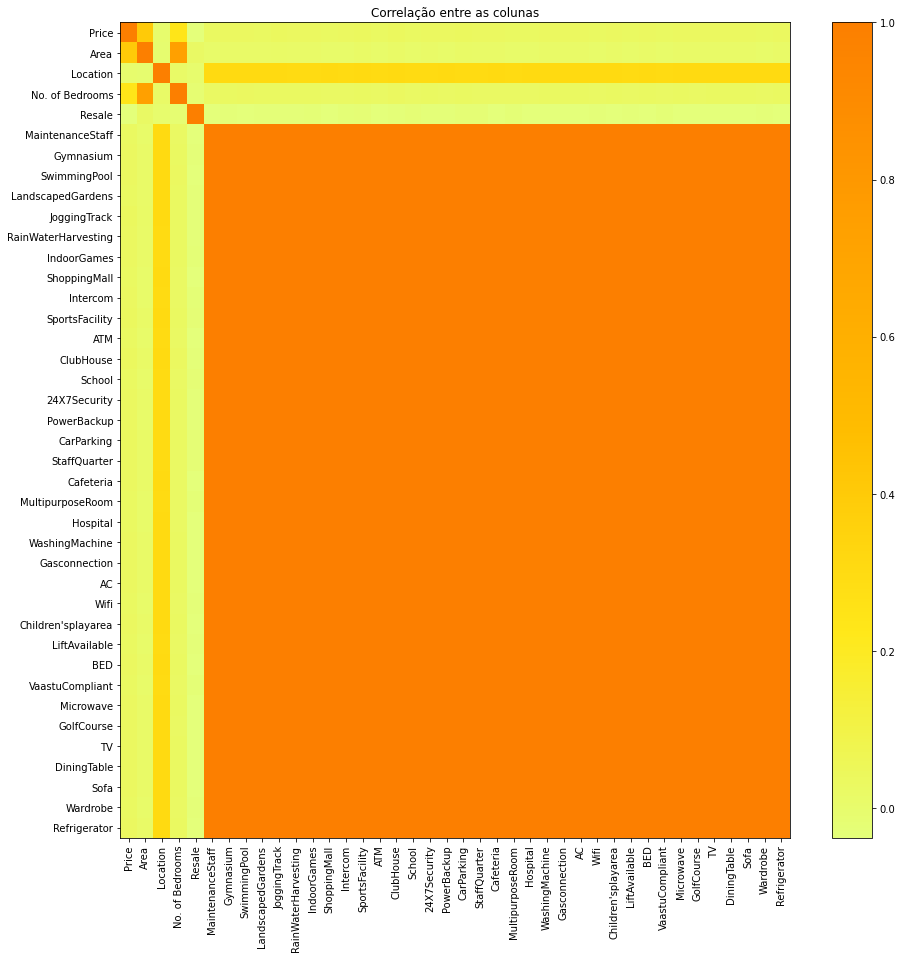

In [304]:
#Com a tabela de correlação podemos observar como os dados se comportam entre si
#Vamos plotar um heatmap para melhor visualização
fig, ax = plt.subplots(figsize=(15,15)) 
plt.xticks(ticks=np.arange(len(corr.columns)), labels = corr.columns, rotation=90) #Criando os ticks para o eixo x
plt.yticks(ticks=np.arange(len(corr.columns)), labels = corr.columns) #Criando os ticks para o eixo y
plt.imshow(corr, cmap='Wistia', interpolation='nearest', aspect='auto') #Plotando o heatmap com a matriz de correlação
plt.title('Correlação entre as colunas') #Adicionando um título
plt.colorbar() #Adicionando a barra de cores

Nota-se que o valor de wifi e wardrobe não possuem correlação entre as outras colunas. Para verificar isso criei um dataframe de teste para observar os valores originais dos dados

In [305]:
test = pd.read_csv('datasets/housing/housing_Bangalore.csv')
test['Wardrobe'].value_counts()

9    4256
0    1951
Name: Wardrobe, dtype: int64

In [306]:
test = pd.read_csv('datasets/housing/housing_Bangalore.csv')
test['Wifi'].value_counts()

9    4256
0    1951
Name: Wifi, dtype: int64

Como podemos notar os valores ou são 0 ou 9, sendo 9 a ausencia de informação, com isso substituimos ela por 0 para constar como se não existisse, e por isso acabou que a coluna não tinha correlação com nada, pois a coluna inteira não se altera independente dos valores de outras colunas

## 3 Regressão Linear Multipla
&nbsp;&nbsp; A regressão linear nos permite criar metodos preditivos a partir do comportamento dos parametros observados. <br>
&nbsp;&nbsp; A regressão linear simples nos permite observar o comportamento de uma variavel independente (X) em uma variavel dependente (Y)<br>
&nbsp;&nbsp; Já na regressão linear multipla observamos o comportamente de multiplas variaveis independentes (X1, X2, ..., Xk) em uma variavel dependente (Y)

## 3.1 Treinando o modelo

In [307]:
#Separemos todas as variaveis independentes em uma variavel X

X = bangalore_df.drop('Price', axis=1)
X.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,3340,0,4,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1045,1,2,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,1179,2,2,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,1675,3,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1670,4,3,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [308]:
#Separemos a variavel dependente em uma variavel y
y = bangalore_df['Price']
y.head()

0    30000000
1     7888000
2     4866000
3     8358000
4     6845000
Name: Price, dtype: int64

In [309]:
#Criando o modelo de regressão linear
modelo = LinearRegression() #Criando o modelo
modelo.fit(X, y) #Treinando o modelo com nossas variaveis independentes e dependentes

LinearRegression()

In [310]:
print(f'Coeficientes: {modelo.coef_}') #Imprimindo os coeficientes
print(f'Intercepto: {modelo.intercept_}') #Imprimindo o intercepto
print(f'R2: {modelo.score(X, y)}') #Imprimindo o R2


Coeficientes: [ 8.61307098e+03 -2.05334172e+03 -2.58260433e+06 -2.37986149e+06
 -1.98552140e+06 -1.98780303e+05  3.30393819e+06 -5.61057569e+06
  2.67023948e+06  3.97926953e+06  9.64069360e+05  9.08728022e+05
 -1.89684583e+05  2.44782116e+06 -2.02393437e+06 -9.45547698e+03
 -3.52656589e+06  9.43140065e+05  1.02235871e+06  2.96571127e+06
 -7.47257086e+04 -6.29512921e+05 -2.08549670e+06  2.79305861e+05
  2.80685403e+05 -1.33513505e+05  1.09516601e+06  5.44703395e+04
 -1.47593378e+05 -3.40677546e+06 -9.29230790e+05 -1.90733923e+06
  2.80685403e+05  8.70048909e+05  2.80685403e+05  2.80685403e+05
  2.80685403e+05  5.44703395e+04  2.80685403e+05]
Intercepto: 1199273.2483410109
R2: 0.1854841673440456


## 3.2 Testando os valores gerados pelo modelo


In [311]:
# Testando o modelo com os dados de treino
# Retirando uma amostra dos dados de treino
amostra = bangalore_df.sample(1)

price = amostra['Price'].values[0] #Preço real
amostra = amostra.drop('Price', axis=1) #Removendo o preço da amostra
print(f'Preço real: {price}') #Imprimindo o preço real
print(f'Preço previsto: {modelo.predict(amostra)[0]}') #Imprimindo o preço previsto


Preço real: 5447000
Preço previsto: 5108237.907001708


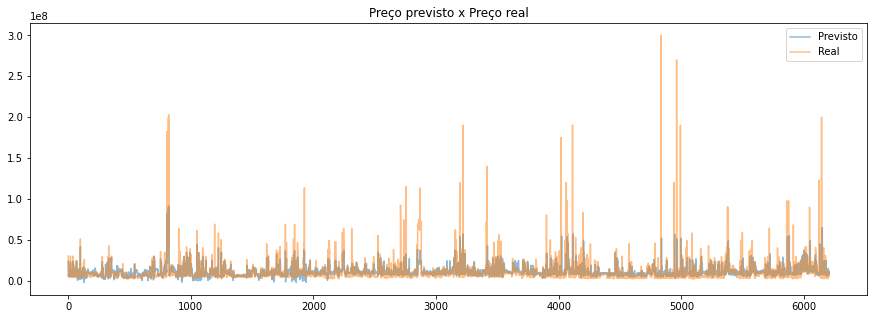

In [322]:
#Gerando um grafico com todos os valores previstos e reais para observarmos a diferença
plt.figure(figsize=(15, 5))
plt.plot(modelo.predict(X), label='Previsto', alpha=0.5)
plt.plot(y, label='Real', alpha=0.5)
plt.title('Preço previsto x Preço real')
plt.legend()
plt.show()


# 4 Conclusão:
Como nota-se o coeficiente de determinação do modelo é de 0,18548. Ou seja, o modelo não é tão preciso. Para a resolução disso necessitaria que o dataset base fosse totalmente preenchido, sem valores ausentes. Outro fator determinante para o modelo é a variação de preços com atributos proximos, visto que esses valores foram gerados por humanos e alguns de forma imprecisa.

Porem, mesmo com o coeficiente de terminação baixo o modelo pode ainda auxiliar na tomada de decisões para profissionais da aréa de corretagem de imoveis.

# 5 Testando o modelo em outras bases de dados:

In [313]:
#Carregando os dados de teste
Chennai_df = pd.read_csv('datasets/housing/housing_Chennai.csv')
Delhi_df = pd.read_csv('datasets/housing/housing_Delhi.csv')
Hyderabad_df = pd.read_csv('datasets/housing/housing_Hyderabad.csv')
Kolkata_df = pd.read_csv('datasets/housing/housing_Kolkata.csv')
Mumbai_df = pd.read_csv('datasets/housing/housing_Mumbai.csv')

In [316]:
#substituindo os valores categóricos por valores numéricos
Chennai_df['Location'] = Chennai_df['Location'].map(dic_location(Chennai_df))
Delhi_df['Location'] = Delhi_df['Location'].map(dic_location(Delhi_df))
Hyderabad_df['Location'] = Hyderabad_df['Location'].map(dic_location(Hyderabad_df))
Kolkata_df['Location'] = Kolkata_df['Location'].map(dic_location(Kolkata_df))
Mumbai_df['Location'] = Mumbai_df['Location'].map(dic_location(Mumbai_df))

In [317]:
#Verificando os valores vazios
print(f'Chennai: {Chennai_df.isnull().sum().sum()}')
print(f'Delhi: {Delhi_df.isnull().sum().sum()}')
print(f'Hyderabad: {Hyderabad_df.isnull().sum().sum()}')
print(f'Kolkata: {Kolkata_df.isnull().sum().sum()}')
print(f'Mumbai: {Mumbai_df.isnull().sum().sum()}')


Chennai: 0
Delhi: 0
Hyderabad: 0
Kolkata: 0
Mumbai: 0


In [318]:
#Treinando o modelo com os dados de treino
XChennai = Chennai_df.drop('Price', axis=1)
yChennai = Chennai_df['Price']

XDelhi = Delhi_df.drop('Price', axis=1)
yDelhi = Delhi_df['Price']

XHyderabad = Hyderabad_df.drop('Price', axis=1)
yHyderabad = Hyderabad_df['Price']

XKolkata = Kolkata_df.drop('Price', axis=1)
yKolkata = Kolkata_df['Price']

XMumbai = Mumbai_df.drop('Price', axis=1)
yMumbai = Mumbai_df['Price']


In [319]:
modeloChennai = LinearRegression()
modeloChennai.fit(XChennai, yChennai)

modeloDelhi = LinearRegression()
modeloDelhi.fit(XDelhi, yDelhi)

modeloHyderabad = LinearRegression()
modeloHyderabad.fit(XHyderabad, yHyderabad)

modeloKolkata = LinearRegression()
modeloKolkata.fit(XKolkata, yKolkata)

modeloMumbai = LinearRegression()
modeloMumbai.fit(XMumbai, yMumbai)

LinearRegression()

In [321]:
#Verificando valores dos testes
print(f'R2 Chennai: {modeloChennai.score(XChennai, yChennai)}')
print(f'R2 Delhi: {modeloDelhi.score(XDelhi, yDelhi)}')
print(f'R2 Hyderabad: {modeloHyderabad.score(XHyderabad, yHyderabad)}')
print(f'R2 Kolkata: {modeloKolkata.score(XKolkata, yKolkata)}')
print(f'R2 Mumbai: {modeloMumbai.score(XMumbai, yMumbai)}')

R2 Chennai: 0.23624397155235954
R2 Delhi: 0.1716567688410281
R2 Hyderabad: 0.7091727266058587
R2 Kolkata: 0.06464280168606029
R2 Mumbai: 0.1229192371461505


In [320]:
#Testando o modelo com os dados de teste
#Retirando uma amostra dos dados de teste
amostraChennai = Chennai_df.sample(1)
priceChennai = amostraChennai['Price'].values[0]
amostraChennai = amostraChennai.drop('Price', axis=1)
print(f'Preço real Chennai: {priceChennai}')
print(f'Preço previsto Chennai: {modeloChennai.predict(amostraChennai)[0]}')

print("----")

amostraDelhi = Delhi_df.sample(1)
priceDelhi = amostraDelhi['Price'].values[0]
amostraDelhi = amostraDelhi.drop('Price', axis=1)
print(f'Preço real Delhi: {priceDelhi}')
print(f'Preço previsto Delhi: {modeloDelhi.predict(amostraDelhi)[0]}')

print("----")

amostraHyderabad = Hyderabad_df.sample(1)
priceHyderabad = amostraHyderabad['Price'].values[0]
amostraHyderabad = amostraHyderabad.drop('Price', axis=1)
print(f'Preço real Hyderabad: {priceHyderabad}')
print(f'Preço previsto Hyderabad: {modeloHyderabad.predict(amostraHyderabad)[0]}')

print("----")

amostraKolkata = Kolkata_df.sample(1)
priceKolkata = amostraKolkata['Price'].values[0]
amostraKolkata = amostraKolkata.drop('Price', axis=1)
print(f'Preço real Kolkata: {priceKolkata}')
print(f'Preço previsto Kolkata: {modeloKolkata.predict(amostraKolkata)[0]}')

print("----")

amostraMumbai = Mumbai_df.sample(1)
priceMumbai = amostraMumbai['Price'].values[0]
amostraMumbai = amostraMumbai.drop('Price', axis=1)
print(f'Preço real Mumbai: {priceMumbai}')
print(f'Preço previsto Mumbai: {modeloMumbai.predict(amostraMumbai)[0]}')


Preço real Chennai: 3843000
Preço previsto Chennai: 13584461.95892129
----
Preço real Delhi: 13500000
Preço previsto Delhi: 30845645.028404027
----
Preço real Hyderabad: 4044000
Preço previsto Hyderabad: 5481573.063021006
----
Preço real Kolkata: 7300000
Preço previsto Kolkata: 7687738.20743788
----
Preço real Mumbai: 8000000
Preço previsto Mumbai: 9881687.617642665


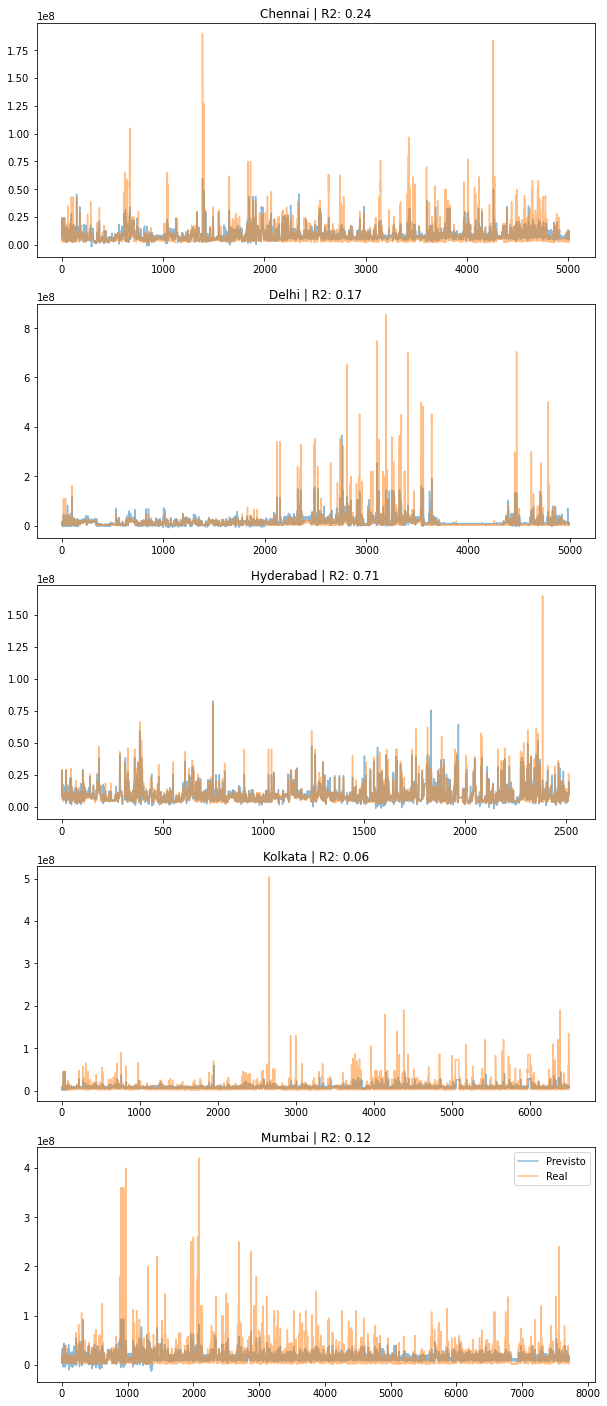

In [330]:
#Visualizando os resultados
fig, ax = plt.subplots(5, 1, figsize=(10, 25))
ax[0].plot(modeloChennai.predict(XChennai), label='Previsto', alpha=0.5)
ax[0].plot(yChennai, label='Real', alpha=0.5)
ax[0].set_title(f'Chennai | R2: {modeloChennai.score(XChennai, yChennai):.2f}')

ax[1].plot(modeloDelhi.predict(XDelhi), label='Previsto', alpha=0.5)
ax[1].plot(yDelhi, label='Real', alpha=0.5)
ax[1].set_title(f'Delhi | R2: {modeloDelhi.score(XDelhi, yDelhi):.2f}')

ax[2].plot(modeloHyderabad.predict(XHyderabad), label='Previsto', alpha=0.5)
ax[2].plot(yHyderabad, label='Real', alpha=0.5)
ax[2].set_title(f'Hyderabad | R2: {modeloHyderabad.score(XHyderabad, yHyderabad):.2f}')

ax[3].plot(modeloKolkata.predict(XKolkata), label='Previsto', alpha=0.5)
ax[3].plot(yKolkata, label='Real', alpha=0.5)
ax[3].set_title(f'Kolkata | R2: {modeloKolkata.score(XKolkata, yKolkata):.2f}')

ax[4].plot(modeloMumbai.predict(XMumbai), label='Previsto', alpha=0.5)
ax[4].plot(yMumbai, label='Real', alpha=0.5)
ax[4].set_title(f'Mumbai | R2: {modeloMumbai.score(XMumbai, yMumbai):.2f}')

plt.legend()
plt.show()